In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval


from collections import OrderedDict

In [2]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    "FedProt":"black",
    "Fisher":"#D44400",
    "Stouffer":"#E69F00",
    "REM":"#2E5EAA",
    "RankProd":"#009E73"
})

In [3]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"

# Plot boxplot

In [4]:
# Function to load data based on mode
def load_data(mode):
    rmse_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/RMSE.csv", index_col=0).T
    nrmse_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/NRMSE.csv", index_col=0).T
    r_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/r.csv", index_col=0).T
    rho_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/rho.csv", index_col=0).T
    return rmse_pv_df, nrmse_pv_df, r_pv_df, rho_pv_df

# Plot correlations

In [7]:
def log_transform_df(df):
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    return df

Results loaded for DEqMS with 6000 proteins.
Results loaded for FedProt with 6000 proteins.
Results loaded for Fisher with 6000 proteins.
Results loaded for REM with 6000 proteins.
Results loaded for Stouffer with 6000 proteins.
Results loaded for RankProd with 6000 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/balanced/results with 6000 genes. Adj.p-values were not log-transformed.
Results loaded for DEqMS with 6000 proteins.
Results loaded for FedProt with 6000 proteins.
Results loaded for Fisher with 6000 proteins.
Results loaded for REM with 6000 proteins.
Results loaded for Stouffer with 6000 proteins.
Results loaded for RankProd with 6000 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/mild_imbalanced/results with 6000 genes. Adj.p-values were not log-transformed.
Results loaded for DEqMS with 6000 proteins.
Results loaded for FedProt with 6000 proteins.
Results loaded for Fisher with 6000 proteins.
Res

(5998, 13)


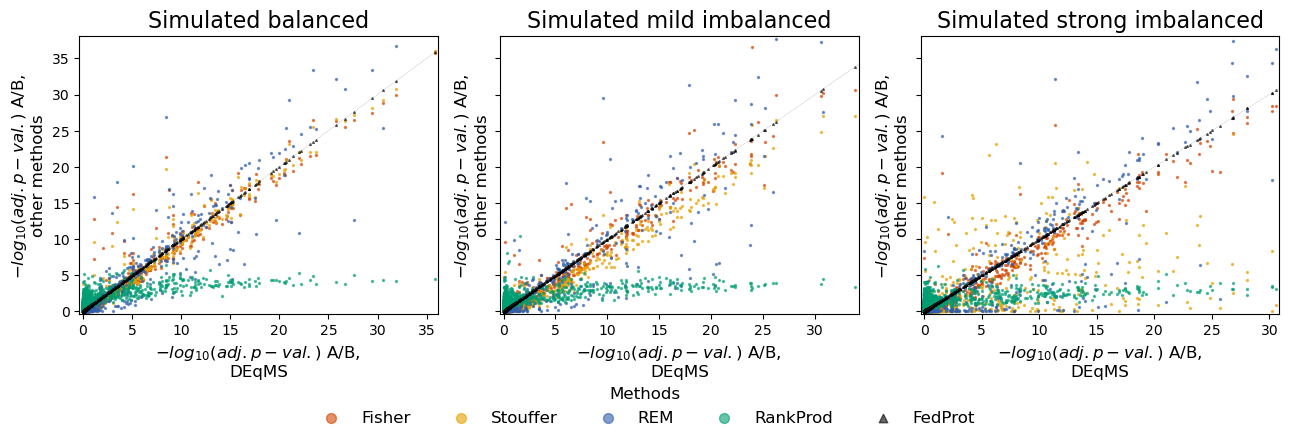

In [8]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"

dfs = {}

fedprot_name="DPE.tsv"
deqms_name="res.tsv"
fisher_name="MA_CM.tsv"
rem_name="MA_REM.tsv"
stouffer_name="MA_Stouffer.tsv"
rankprod_name="MA_RankProd.tsv"


prefix = f"/30_"

workdir = root_dir + "balanced/results" 
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}",
    simulated=True
)
dfs["Balanced"] = df

prefix = f"/30_"
workdir = root_dir + "mild_imbalanced/results" 
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}",
    simulated=True
)
dfs["Mild_imbalanced"] = df

prefix = f"/36_"
workdir = root_dir + "imbalanced/results"
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}",
    simulated=True
)
dfs["Imbalanced"] = df


print(dfs["Imbalanced"].shape)
dfs["Imbalanced"].head(4)

log_dfs = {k: log_transform_df(v) for k,v in dfs.items()}

fp_eval.plt_results(
    log_dfs, 
    methods=["Fisher","Stouffer","REM","RankProd", "FedProt"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=2,
    datasets=["Balanced", "Mild_imbalanced", "Imbalanced"],
    comparsions = ["A/B", "A/B", "A/B"],
    add_table=False,
    figsize=(13, 4),
    after_comma=2,
    titles = ["Simulated balanced", "Simulated mild imbalanced", "Simulated strong imbalanced"]
)


Plotting corrs using logFC values.


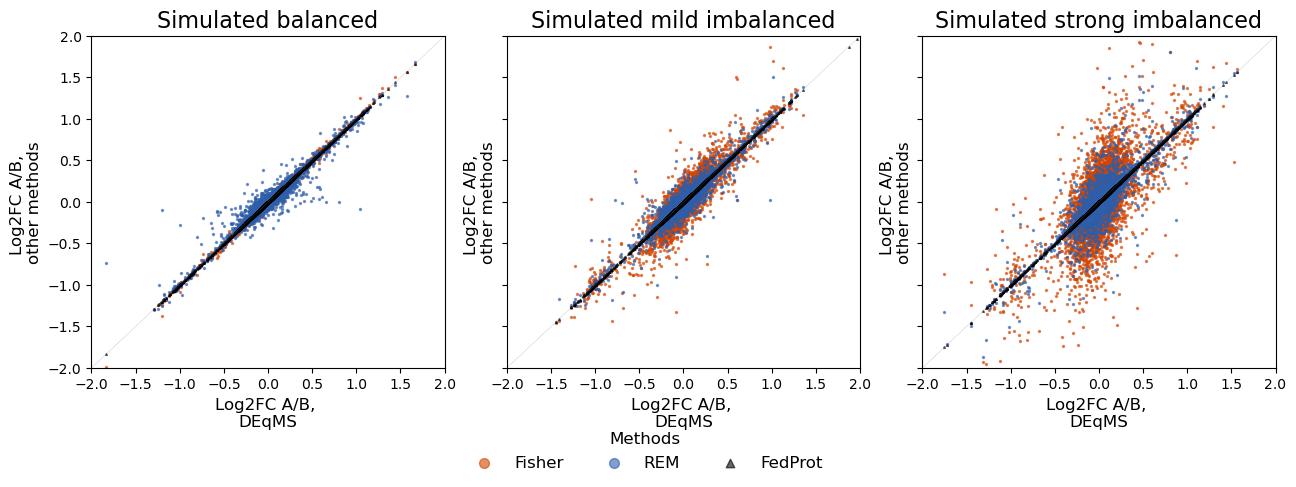

In [10]:
selected_colors = OrderedDict()
selected_colors["Methods"] = OrderedDict({
    "FedProt":"black",
    "Fisher":"#D44400",
    "REM":"#2E5EAA"
})

fp_eval.plt_results(
    log_dfs, 
    methods=["Fisher", "REM", "FedProt"],
    color_dict=selected_colors,
    what="lfc_", 
    text="", dotsize=2,
    datasets=["Balanced", "Mild_imbalanced", "Imbalanced"],
    comparsions = ["A/B", "A/B", "A/B"],
    add_table=False,
    figsize=(13, 4.5),
    set_lims=[[-2,2], [-2,2], [-2,2]],
    titles = ["Simulated balanced", "Simulated mild imbalanced", "Simulated strong imbalanced"]
)


In [11]:
# how many values are above 1.7 or below -1.7 for bacterial dataset
for dataset in log_dfs:
    df = log_dfs[dataset]
    number = 2
    print(f"Dataset: {dataset}")
    for method in ["DEqMS", "FedProt", "Fisher", "Stouffer", "REM", "RankProd"]:
        print(f"\tMethod: {method}")
        print(f"\t\tValues [> {number} or < -{number}]: {len(df[(df['lfc_'+method] > number) | (df['lfc_'+method] < -1 * number)])}")
        # % out of all proteins
        print(f"\t\t% of values : {len(df[(df['lfc_'+method] > number) | (df['lfc_'+method] < -1 * number)])/len(df)*100:.2f}%")

Dataset: Balanced
	Method: DEqMS
		Values [> 2 or < -2]: 0
		% of values : 0.00%
	Method: FedProt
		Values [> 2 or < -2]: 0
		% of values : 0.00%
	Method: Fisher
		Values [> 2 or < -2]: 0
		% of values : 0.00%
	Method: Stouffer
		Values [> 2 or < -2]: 0
		% of values : 0.00%
	Method: REM
		Values [> 2 or < -2]: 0
		% of values : 0.00%
	Method: RankProd
		Values [> 2 or < -2]: 0
		% of values : 0.00%
Dataset: Mild_imbalanced
	Method: DEqMS
		Values [> 2 or < -2]: 2
		% of values : 0.03%
	Method: FedProt
		Values [> 2 or < -2]: 2
		% of values : 0.03%
	Method: Fisher
		Values [> 2 or < -2]: 5
		% of values : 0.08%
	Method: Stouffer
		Values [> 2 or < -2]: 5
		% of values : 0.08%
	Method: REM
		Values [> 2 or < -2]: 4
		% of values : 0.07%
	Method: RankProd
		Values [> 2 or < -2]: 5
		% of values : 0.08%
Dataset: Imbalanced
	Method: DEqMS
		Values [> 2 or < -2]: 0
		% of values : 0.00%
	Method: FedProt
		Values [> 2 or < -2]: 0
		% of values : 0.00%
	Method: Fisher
		Values [> 2 or < -2]:

# Jaccard plot

In [12]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"
jaccard_topN_dfs ={

    "Balanced": pd.read_csv(f"{root_dir}balanced/aggreagated/jaccard_topN.csv", index_col=[1]),
    "Mild imbalanced": pd.read_csv(f"{root_dir}mild_imbalanced/aggreagated/jaccard_topN.csv", index_col=[1]),
    "Imbalanced": pd.read_csv(f"{root_dir}imbalanced/aggreagated/jaccard_topN.csv", index_col=[1])
}

# remove Unnamed: 0 column
for k, df in jaccard_topN_dfs.items():
    df.drop(df.columns[0], axis=1, inplace=True)


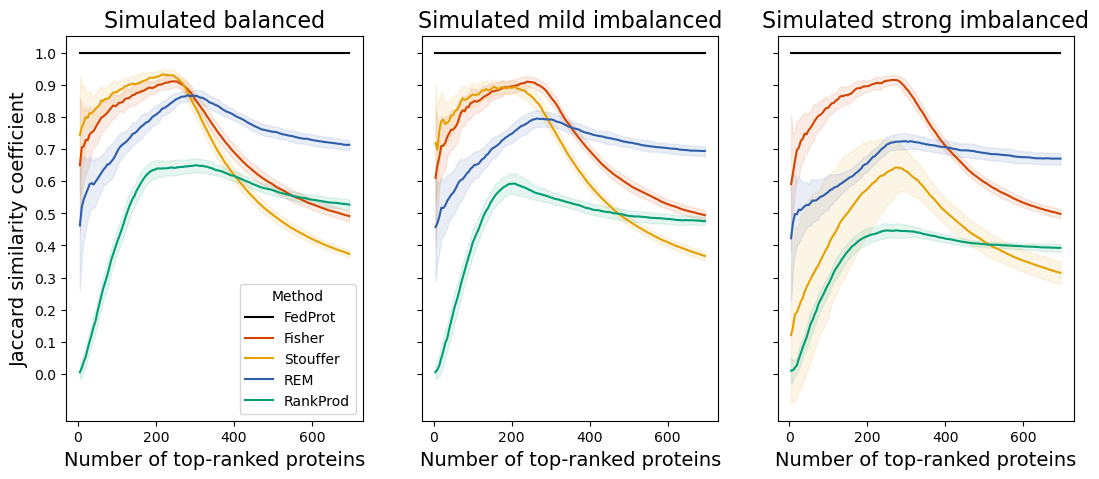

In [13]:
fp_eval.plot_with_confidence(
    jaccard_topN_dfs,
    ["FedProt", "Fisher", "Stouffer", "REM", "RankProd"], 
    color_dict,
    num_top_genes=list(jaccard_topN_dfs['Balanced'].columns),
    figsize=(13, 5),
    titles=["Balanced", "Mild imbalanced", "Strong Imbalanced"]
)
